## Introduction
This Python Notebook is a simple example to show how can data science be applied to Covid-19 updated data. We'll see how to deal with different data structures and basic Machine Learning algorithms to cluster similar tendencies among countries.

In [7]:
# Load Python Libraries (all of them can be installed with pip commands)
import numpy as np
import csv
import matplotlib.pyplot as plt


# Data Gathering and Analysis

The first thing we should do is download different datasets. 
On the one hand, Kaggle releases every night a public set of csv files with updated info of worldwide Covid19 cases: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset (by logging in, the dataset is available). 
In this dataset, we'll find 6 files, but we'll just use the ones regarding time-series (feel free to examine all of them tho). If you open these csv's, you'll see that each row corresponds to a single country; besides, the first 4 columns indicate (for each country) the name of the province/country, plus its latitude and longitude. The remaining columns indicate the number of cases of Covid-19 in a timeline. 
As it can be seen, there are three different types of time-series, belonging to the (1) Confirmed, (2) Death and (3) Recovered cases of Covid-19.
On the other hand, we might want to complement the information extracted from Kaggle's data: for instance, the number of confirmed people is not the same for a huge country (eg Russia) than for a really small one (eg Andorra). For this reason, we'll download to other datasets from "The World Bank": (a) https://data.worldbank.org/indicator/SP.POP.TOTL total population per country, and (b) https://data.worldbank.org/indicator/AG.LND.TOTL.K2 land area per country. 

However, mixing both types of datasets (Kaggle + World Bank) is not that straight-forward, since Country names can be written in different ways. I tried to find all exceptions, and wrote them down in the string lists that can be seen below the paths: namesCsv1 correspond to the Country names of Kaggle, namesCsv2 to the ones of World Bank, and namesLeft to the ones that I did not find a proper match. 

Once we set paths and filenames... 

In [8]:
strPath = '/Users/arbues/Documents/Covid19/novel-corona-virus-2019-dataset/' # Change it to your own
fileCovidCONF = strPath + 'time_series_covid_19_confirmed.csv'
fileCovidDEATH = strPath + 'time_series_covid_19_deaths.csv'
fileCovidREC = strPath + 'time_series_covid_19_recovered.csv'
filePopulation = strPath + 'Population.csv' # Check if the filename matches yours 
fileLand = strPath + 'LandArea.csv' # Check if the filename matches yours

namesCsv1 = ['Slovak Republic', 'Venezuela, RB', 'St. Lucia', 'Brunei Darussalam', 'Congo, Dem. Rep.', 'Jersey', 'Egypt, Arab Rep.', 'Russian Federation', 'United States', 'St. Martin (French part)', 'Korea, Rep.', 'Iran, Islamic Rep.', 'Czech Republic', 'St. Vincent and the Grenadines']
namesCsv2 = ['Slovakia', 'Venezuela', 'Saint Lucia', 'Brunei', 'Congo (Kinshasa)', 'Channel Islands', 'Egypt', 'Russia', 'US', 'Martinique', 'Korea, South', 'Iran', 'Czechia', 'Saint Vincent and the Grenadines']
namesLeft = ['Cruise Ship', 'Guernsey', 'occupied Palestinian territory', 'Holy See', 'French Guiana', 'Guadeloupe', 'Reunion', 'Taiwan*', 'Jersey']

In order to store all data from each csv file into lists, basic functions can be created. Note that this structure could be a Pandas Dataframe, but I preferred to show its use in simple structures. In order to read these files, the following function is declared. 

In [9]:
def readIndDDR(strInd):
    lProvince = []
    lCountry = []
    lLat = []
    lLong = []
    lEvol = []

    bFirst = False

    with open(strInd, 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            if bFirst:
                lProvince.append(row[0])
                lCountry.append(row[1])
                lLat.append(float(row[2]))
                lLong.append(float(row[3]))
                lEvol.append([float(s) for s in row[4:]])
            else:
                bFirst = True

    return lProvince, lCountry, lLat, lLong, lEvol

And now, we can read every single time-series file by:

In [10]:
lProvinceDET, lCountryDET, lLatDET, lLongDET, lEvolDET = readIndDDR(fileCovidCONF)
lProvinceDEA, lCountryDEA, lLatDEA, lLongDEA, lEvolDEA = readIndDDR(fileCovidDEATH)
lProvinceREC, lCountryREC, lLatREC, lLongREC, lEvolREC = readIndDDR(fileCovidREC)

# Example, if we want to print the number of Covid-19 cases in a given country... 
sTargetCountry = 'Spain'
print('Covid-19 in ' + sTargetCountry)
print('Confirmed Cases (per day): ' + str(lEvolDET[lCountryDET.index(sTargetCountry)]))
print('Deaths Cases (per day): ' + str(lEvolDEA[lCountryDET.index(sTargetCountry)]))
print('Recoverded Cases (per day): ' + str(lEvolREC[lCountryDET.index(sTargetCountry)]))

Covid-19 in Spain
Confirmed Cases (per day): [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 6.0, 13.0, 15.0, 32.0, 45.0, 84.0, 120.0, 165.0, 222.0, 259.0, 400.0, 500.0, 673.0, 1073.0, 1695.0, 2277.0, 2277.0, 5232.0, 6391.0]
Deaths Cases (per day): [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 5.0, 10.0, 17.0, 28.0, 35.0, 54.0, 55.0, 133.0, 195.0]
Recoverded Cases (per day): [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 30.0, 30.0, 32.0, 32.0, 183.0, 183.0, 193.0, 517.0]


However, these data don't show much, as it is difficult to interpret from raw numbers. Besides, there's one main issue: countries such as United States are decomposed into different states, so there is no way to compare the country as a whole. The next step is then to group different provinces into the same country. The time-series values will be added into the same vector, whilst the lattitude and longitude values will be averaged. 

In [11]:
def joinCountries(ilProvince, ilCountry, ilLat, ilLong, ilEvol):
    lCountry = []
    lLat = []
    lLong = []
    lEvol = []
    lTimes = []
    for i in range(0, len(ilCountry)):
        if ilCountry[i] not in lCountry and ilCountry[i] not in namesLeft:
            lCountry.append(ilCountry[i])
            lTimes.append(1)
            lLat.append(ilLat[i])
            lLong.append(ilLong[i])
            lEvol.append(ilEvol[i])
        elif ilCountry[i] not in namesLeft:
            indCountry = lCountry.index(ilCountry[i])
            lTimes[indCountry] = lTimes[indCountry] + 1
            lLat[indCountry] = lLat[indCountry] + (ilLat[i])
            lLong[indCountry] = lLong[indCountry] + (ilLong[i])
            lEvol[indCountry] = [a+b for a,b in zip (lEvol[indCountry],ilEvol[i])]
    return lCountry, [x/y for x, y in zip(lLat, lTimes)], [x/y for x, y in zip(lLong, lTimes)], lEvol

Once again, we can repeat the same process we did before and cluster data for each country just by calling the "joinCountries" function (which, as it can be seen, does not return any kind of "Province" list). 

In [12]:
lCountryDET, lLatDET, lLongDET, lEvolDET = joinCountries(lProvinceDET, lCountryDET, lLatDET, lLongDET, lEvolDET)
lCountryDEA, lLatDEA, lLongDEA, lEvolDEA = joinCountries(lProvinceDEA, lCountryDEA, lLatDEA, lLongDEA, lEvolDEA)
lCountryREC, lLatREC, lLongREC, lEvolREC = joinCountries(lProvinceREC, lCountryREC, lLatREC, lLongREC, lEvolREC)

At this moment, data can already be plotted in a simple way. Just by defining some target countries, different plots can be extracted for Confirmed - Deaths - Recovered cases. Feel free to change names or add more countries for your own purposes; as it can be seen, to add another Country, you simply have to uncomment the sTargetCountry4 corresponding lines (and do the same once again for other candidates). 

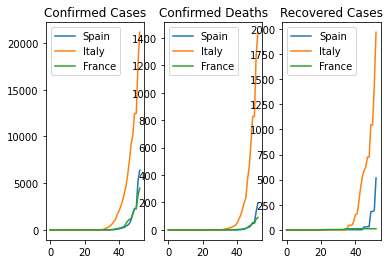

In [13]:
sTargetCountry1 = 'Spain'
sTargetCountry2 = 'Italy'
sTargetCountry3 = 'France'
# sTargetCountry4 = ''
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.plot(lEvolDET[lCountryDET.index(sTargetCountry1)],label=sTargetCountry1)
ax1.plot(lEvolDET[lCountryDET.index(sTargetCountry2)],label=sTargetCountry2)
ax1.plot(lEvolDET[lCountryDET.index(sTargetCountry3)],label=sTargetCountry3)
# ax1.plot(lEvolDET[lCountryDET.index(sTargetCountry4)],label=sTargetCountry4)
ax1.set_title('Confirmed Cases')
ax2.plot(lEvolDEA[lCountryDEA.index(sTargetCountry1)],label=sTargetCountry1)
ax2.plot(lEvolDEA[lCountryDEA.index(sTargetCountry2)],label=sTargetCountry2)
ax2.plot(lEvolDEA[lCountryDEA.index(sTargetCountry3)],label=sTargetCountry3)
# ax2.plot(lEvolDEA[lCountryDEA.index(sTargetCountry4)],label=sTargetCountry4)
ax2.set_title('Confirmed Deaths')
ax3.plot(lEvolREC[lCountryREC.index(sTargetCountry1)],label=sTargetCountry1)
ax3.plot(lEvolREC[lCountryREC.index(sTargetCountry2)],label=sTargetCountry2)
ax3.plot(lEvolREC[lCountryREC.index(sTargetCountry3)],label=sTargetCountry3)
# ax3.plot(lEvolREC[lCountryREC.index(sTargetCountry4)],label=sTargetCountry4)
ax3.set_title('Recovered Cases')
legentPos = "upper left" # Could be "lower / upper / left / right"
legDET = ax1.legend(loc=legentPos)
legDEA = ax2.legend(loc=legentPos)
legREC = ax3.legend(loc=legentPos)
plt.show()


Now, it is the moment to contextualize all data by merging Covid-19 cases with country information, such as the total population or even the corresponding land in km2. As Covid-19 is a virus that spreads with ease between humans, the number of people/squared meter seems like a relevant feature to take into account. To read data from World Bank, the following function can be used. 

In [14]:
def readPopulation(sFilePop):
    lCountry = []
    lPopulation = []
    bFirst = 0
    with open(sFilePop, 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            if bFirst > 4:
                try:
                    lCountry.append(row[0])
                    lPopulation.append(float(row[-3]))
                except:
                    pass
            else:
                bFirst += 1

    return lCountry, lPopulation

In [15]:
lCountryPOP, lPopulation = readPopulation(filePopulation)
lCountryLAND, lLand = readPopulation(fileLand)

Nevertheless, as it has been pointed out before, the matching between Country names within different datasets is not perfect, so the resulting data structures after loading files should be filtered using the exceptions that have been found (namesCsv1, namesCsv2 lists, declared at the beginning). 

In [16]:
def joinPopLat(lCountry, lCountryPOP, lPopulation):
    ilCountryPOP = []
    ilPopulation = []
    for i in range(0, len(lCountryPOP)):
        try:
            if lCountryPOP[i] in namesCsv1:
                strCoun = namesCsv2[namesCsv1.index(lCountryPOP[i])]
            else:
                strCoun = lCountryPOP[i]
            if lCountry.index(strCoun) >= 0:
                ilCountryPOP.append(strCoun)
                try:
                    ilPopulation.append(lPopulation[lCountry.index(strCoun)])
                except:
                    pass
        except:
            pass
    return ilCountryPOP, ilPopulation

In [17]:
flCountryPOP, flPopulation = joinPopLat(lCountryDET, lCountryPOP, lPopulation)
flCountryLAND, flLand = joinPopLat(lCountryDET, lCountryLAND, lLand)

Once all data is loaded and stored into variables, an optional step is performed to sort all lists in the same way: i.e., force that the first position in the lists of all Kaggle data belong to the same country as the one in the first position of World Bank Data. To do so: 

In [18]:
lCountryKAG, lEvolDETb, lEvolDEAb, lEvolRECb = zip(*sorted(zip(lCountryDET, lEvolDET, lEvolDEA, lEvolREC)))
flCountryWB, flPopulationb, flLandb = zip(*sorted(zip(flCountryPOP, flPopulation, flLand)))
# As it can be proved, lCountryKAG==flCountryWB. 

With this new contextualization data, the previous visualizations can be changed accordingly, which means that we can take a look not only at the absolute number of Confirmed/Deaths/Recovered cases, but also convert it in a ratio depending on the number of people/squared meter (or just divided by the number of people). In the following code, the floating numbers stored in "divFac" variables add the additional info: 

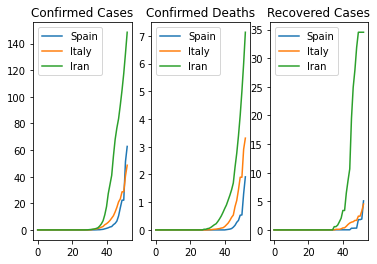

In [19]:
sTargetCountry1 = 'Spain'
sTargetCountry2 = 'Italy'
sTargetCountry3 = 'Iran'
# sTargetCountry4 = ''
# Division factors, which are nPeople/sqMeter, this could be changed, for instance, to simply divFac1 = flPopulation[lCountryKAG.index(sTargetCountry1)]
divFac1 = flPopulationb[lCountryKAG.index(sTargetCountry1)]/flLandb[lCountryKAG.index(sTargetCountry1)]
divFac2 = flPopulationb[lCountryKAG.index(sTargetCountry2)]/flLandb[lCountryKAG.index(sTargetCountry2)]
divFac3 = flPopulationb[lCountryKAG.index(sTargetCountry3)]/flLandb[lCountryKAG.index(sTargetCountry3)]
# divFac4
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.plot(np.array(lEvolDETb[lCountryKAG.index(sTargetCountry1)])/divFac1,label=sTargetCountry1)
ax1.plot(np.array(lEvolDETb[lCountryKAG.index(sTargetCountry2)])/divFac2,label=sTargetCountry2)
ax1.plot(np.array(lEvolDETb[lCountryKAG.index(sTargetCountry3)])/divFac3,label=sTargetCountry3)
# ax1.plot(np.array(lEvolDET[lCountryDET.index(sTargetCountry4)])/divFac4,label=sTargetCountry4)
ax1.set_title('Confirmed Cases')
ax2.plot(np.array(lEvolDEAb[lCountryKAG.index(sTargetCountry1)])/divFac1,label=sTargetCountry1)
ax2.plot(np.array(lEvolDEAb[lCountryKAG.index(sTargetCountry2)])/divFac2,label=sTargetCountry2)
ax2.plot(np.array(lEvolDEAb[lCountryKAG.index(sTargetCountry3)])/divFac3,label=sTargetCountry3)
# ax2.plot(lEvolDEA[lCountryDEA.index(sTargetCountry4)],label=sTargetCountry4)
ax2.set_title('Confirmed Deaths')
ax3.plot(np.array(lEvolRECb[lCountryKAG.index(sTargetCountry1)])/divFac1,label=sTargetCountry1)
ax3.plot(np.array(lEvolRECb[lCountryKAG.index(sTargetCountry2)])/divFac2,label=sTargetCountry2)
ax3.plot(np.array(lEvolRECb[lCountryKAG.index(sTargetCountry3)])/divFac3,label=sTargetCountry3)
# ax3.plot(lEvolREC[lCountryREC.index(sTargetCountry4)],label=sTargetCountry4)
ax3.set_title('Recovered Cases')
legDET = ax1.legend()
legDEA = ax2.legend()
legREC = ax3.legend()
plt.show()

# Clustering + Prediction

After having gathered and analyzed data, the real "fun" comes... Data science, where hidden patterns may be discovered! 

At this point, the real question could be: which are the countries that prevented better and worse from Covid-19? Although there is not a correct answer to this question, we'll extract several features from every single country's data and try to cluster them according to their curve similarity (i.e., how fast did the virus spread, percentage of deaths...). 
In order to do so, we'll use some functionalities from the Machine Learning Python library scikit-learn.

In [36]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

The first thing to do is feature extraction, which aims to characterize numerically the different covid-19 country curves. There is a huuuuuuge number of possibilities when it comes to features, but at this point, we'll perform a simple analysis: 
- The first thing we'll take into account is the different spread timming; if we want to analyze the ratios in a given period of time, we must take as a reference the curve's peak, which will be different for each country. In particular, we can set a parameter (iDays in the code) that gets the appropriate data of the X previous days before the peak. 
- The time series of detected/deaths/recoveries will be converted into cumulative sums; in this way, for a given day, we will have the historical data, plus the number of det/dea/rec for that day. 
Bearing that in mind, in the following snippet you can find up to 15 features (some of them are arrays and some floating numbers) that can be later combined into a single feature vector/country. 

In [37]:
def extractFeatVec(lEvolDET, lEvolDEA, lEvolREC, flCountryPOP, flPopulation, flLand, iDays):
    featVec = []
    peakPosVal = []
    maxDens = max(np.array(flPopulation)/np.array(flLand))
    for iCountry in range(0, len(flCountryPOP)):
        peakPos = np.argmax(np.array(lEvolDET[iCountry]))
        if peakPos < (iDays):
            peakPos = (iDays)
        peakPosVal.append([peakPos, np.max(np.array(lEvolDET[iCountry]))])

        pPeopleDET = np.cumsum(np.array(lEvolDET[iCountry]))[peakPos - iDays:peakPos] # F1 - array: Cumulative sum of detected cases
        pPeopleDETn = np.nan_to_num(pPeopleDET/np.max(pPeopleDET)) # F2 - array: normalized cumulative sum [detected cases]
        pPeopleDETout = pPeopleDETn[:-1] # F3 - array: normalized cumulative sum without the last position (it's always 1) [detected cases]

        pPeopleDEA = np.cumsum(np.array(lEvolDEA[iCountry]))[peakPos - iDays:peakPos] # F4 - array: Cumulative sum of deaths
        pPeopleDEAn = np.nan_to_num(pPeopleDEA[-1] / pPeopleDET[-1]) # F5 - float: total percentage of deaths compared to the detected cases
        pPeopleDEAout = np.nan_to_num(pPeopleDEA / pPeopleDET)[:-1] # F6 - array: normalized cumulative sum of dead people (without the last element)

        pPeopleREC = np.cumsum(np.array(lEvolREC[iCountry]))[peakPos - iDays:peakPos] # F7 - array: Cumulative sum of recoveries
        pPeopleRECn = np.nan_to_num(pPeopleREC[-1] / pPeopleDET[-1]) # F8 - float: total percentage of recoveries compared to the detected cases

        derecMat = np.array([pPeopleDEAn, pPeopleRECn]) # Join floating-numbered features F5 and F8

        fPopDET = pPeopleDET[-1] / flPopulation[iCountry] # F9 - float: percentage of detected cases with respect to the country total population
        fPopDEA = pPeopleDEA[-1] / flPopulation[iCountry] # F10 - float: percentage of deaths with respect to the country total population
        fPopREC = pPeopleREC[-1] / flPopulation[iCountry] # F11 - float: percentage of recoveries with respect to the country total population
        fPopulationn = flPopulation[iCountry] / max(flPopulation) # F12 - float: normalized population with respect to the max country population

        fLandp = pPeopleDET[-1] / flLand[iCountry] # F13 - float: percentage of detected cases with respect to the country total land
        fLandn = flLand[iCountry] / max(flLand) # F14 - float: normalized country land with respect to the max

        fDens = (flPopulation[iCountry] / flLand[iCountry])/maxDens # F15: normalized density
        popMat = np.array([fPopDET, fPopDEA, fPopREC]) # Join floating-numbered features F9 and F10

        featVec.append(np.concatenate([pPeopleDETout,pPeopleDEAout,derecMat,popMat])) # Concatenate features
        
    print('Total Feature Vector size: ' + str(np.array(featVec).shape))
    return featVec, peakPosVal

In [38]:
iDays = 10 # Time-Window
featVecs, peakVal = extractFeatVec(lEvolDETb, lEvolDEAb, lEvolRECb, flCountryWB, flPopulationb, flLandb, iDays)

Total Feature Vector size: (134, 23)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


At this point, we can already cluster using any unsupervised clustering algorithm such as K-Means, GMM or other Hierarchical Clustering techniques. However, there's a large amount of countries which have still not faced Covid-19 at its prime (or maybe the reports are not accurate), so the samples are unbiased, with a large number of countries with few cases. For this reason, we'll only cluster the countries with the highest number of Covid-19 confirmed cases. The number of desired countries can be controlled by changing "topCases", and the number of clusters can be modified with the "nClusters" parameter. 
The technique that has been used to cluster data is a simple "Gaussian Mixture Model" algorithm, and in order to visualize data, PCA has been applied over the first 2 components. 

In [39]:
def buildClusters(featVecs,nClusters,flCountryPOP, bVerbosity, peakPosVal=None, iTop=None):
    if iTop != None:
        valTop = np.argsort(np.array(peakPosVal)[:, 1])
        featVecsF = []
        countryF = []
        posCountries = []
        for iCountry in range(1, iTop+1):
            featVecsF.append(featVecs[valTop[len(valTop)-iCountry]])
            countryF.append(flCountryPOP[valTop[len(valTop)-iCountry]])
            posCountries.append(valTop[len(valTop)-iCountry])
        featVecsF = np.array(featVecsF)
        totCon = iTop
    else:
        featVecsF = np.array(featVecs)
        countryF = flCountryPOP
        totCon = len(featVecs)

    gmm = GaussianMixture(n_components=nClusters).fit(featVecsF)
    labs = gmm.predict(featVecsF)
    
    if bVerbosity:
        for iCountry in range(0, totCon):
            print(countryF[iCountry] + ', ' + str(labs[iCountry]))

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(featVecsF)
    
    if bVerbosity:
        plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=labs, edgecolor='none')
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')
        plt.colorbar()
        plt.show()

    return labs, countryF

China, 1
Italy, 0
Iran, 0
Korea, South, 2
Spain, 4
Germany, 0
France, 0
US, 0
Switzerland, 4
United Kingdom, 0
Norway, 4
Sweden, 4
Netherlands, 4
Denmark, 3
Japan, 2
Belgium, 4
Austria, 4
Qatar, 3
Australia, 2
Malaysia, 2
Greece, 0
Finland, 4
Singapore, 1
Bahrain, 2
Canada, 2
Israel, 0
Czechia, 4
Slovenia, 3
Portugal, 4
Iceland, 0


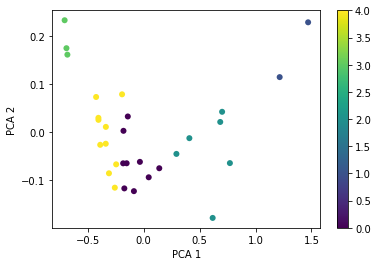

In [31]:
topCases = 30
nClusters = 5
labs, countryF =  buildClusters(featVecs, nClusters, lCountryKAG, True, peakVal, topCases)

As it can be seen, in the baseline example, 5 different clusters can be distinguished, being 2 of them quite far away from the others (cluster 3 with China and Singapore, and group 4 with Denmark, Qatar and Slovenia). The cluster number itself does not tell which countries did a better job when preventing Covid-19, but instead it gives some insights of countries that have similar curves. 

Another interesting application would be the prediction of covid-19 a posteriori; that is, given the shape of the curve until a certain point, predict how many cases will there be the day of tomorrow. Although the implementation is quite naive, it gives some insights about the worst-case scenario of what may happen in a near future if the covid-19 curve keeps increasing. In this case, we can't use unsupervised learning anymore; instead, we'll use a simple linear regression, which will take as inputs some data (observations) and labels (prediction). 

For a given country, by using the same temporal window placed right at the peak of the covid-19 curve, we'll have a vector of N-1 observations, which will be the normalized cumulative sum of confirmed+death cases until the very last day (not included). The set of labels will be the ratio between the last two days, thus quantifying the exponential factor of the curve. Once obtained these vectors for all countries, a Linear Regression model is trained. 

Then, for our test country (sTarget), the same vector of observations will be extracted; once again, we'll take N-1 observations, but this time, the first position will be the 2nd day (hence taking the last day inside the observation vector). The output after introducing the test vector into the LR model will be a floating number, which will indicate the ratio of confirmed/deaths with respect to the last given observation; for instance, if a factor of 1.2 is obtained in a country with a total of 1000 (eg) confirmed covid-19 cases, the ratio indicates that, tomorrow, there will be 1200 cases (200 more). 

Finally, it has to be remarked that joining all countries into one same prediction model would introduce a lot of noise, since curves behave in different exponential ways. For this reason, and using once again the previously seen clustering technique (using more than 150 countries), the training data of a given country will only include observations of other countries belonging to the same cluster. Another parameter has been included in the code to shift between confirmed / deaths predictions (bConDea, set 0 for detections, and 1 for deaths). 

Once again, this is not a robust reliable model, but just a simple example that shows how can linear regression be applied over a set of real-life observations. 

In [40]:
def predictTomorrow(labs, countryF, flCountryPOP, lEvolDET, lEvolDEA, peakVal, iDays, sTarget, sDet):
    Xtrain = []
    ytrain = []
    labelTarget = labs[countryF.index(sTarget)] # Check the cluster of the target country
    for iCountry in range(0, len(countryF)):
        if labs[iCountry] == labelTarget and countryF[iCountry] != sTarget: 
            posOr = flCountryPOP.index(countryF[iCountry]) # Peak in the curve
            peakPos = peakVal[posOr][0]
            timeSDet = lEvolDET[posOr][peakPos-iDays:peakPos] # Get the iDays last observations for confirmed cases
            timeSDea = lEvolDEA[posOr][peakPos-iDays:peakPos] # Get the iDays last observations for dead cases

            Xv = np.nan_to_num((np.cumsum(timeSDet)[:-1])/(np.max(np.cumsum(timeSDet)[:-1]))) # Confirmed cases: Obtain the cumSum until the last day (not included) -> part 1 observations vector
            yv = np.nan_to_num(np.cumsum(timeSDet)[-1]/np.cumsum(timeSDet)[-2]) # Confirmed cases: Obtain the ratio of the last day wrt the previous one

            Xvdea = np.nan_to_num((np.cumsum(timeSDea)[:-1])/(np.max(np.cumsum(timeSDea)[:-1]))) # Deaths: Obtain the cumSum until the last day (not included) -> part 2 observations vector
            yvdea = np.nan_to_num(np.cumsum(timeSDea)[-1]/np.cumsum(timeSDea)[-2]) # Death cases: cases: Obtain the ratio of the last day wrt the previous one

            if np.sum(Xv==0) < int(iDays/2):
                Xtrain.append(np.concatenate([Xv,Xvdea])) # Join both observation vectors
                if sDet == 0: # Depending on the sDet parameter, predict detections of deaths 
                    ytrain.append(yv) 
                else:
                    ytrain.append(yvdea)
                    
        elif countryF[iCountry] == sTarget: # if the country is the target, fill test vectors
            posOr = flCountryPOP.index(countryF[iCountry])
            peakPos = peakVal[posOr][0]
            timeSDetT = lEvolDET[posOr][peakPos - iDays:peakPos]
            timeSDeaT = lEvolDEA[posOr][peakPos - iDays:peakPos]

            Xv = np.nan_to_num((np.cumsum(timeSDetT)[1:]) / (np.max(np.cumsum(timeSDetT)[1:]))) 
            Xvdea = np.nan_to_num((np.cumsum(timeSDeaT)[1:]) / (np.max(np.cumsum(timeSDeaT)[1:])))
            Xtest = np.concatenate([Xv, Xvdea])


    linearReg = LinearRegression()
    linearReg.fit(np.array(Xtrain), np.transpose(np.array(ytrain))) 
    predBoost = linearReg.predict(np.array(Xtest).reshape(1, -1))
    if sDet == 0:
        sPrDD = 'confirmed cases'
        vlPr = timeSDetT[-1]
    else:
        sPrDD = 'deaths'
        vlPr = timeSDeaT[-1]

    print('The number of ' + sPrDD + ' cases until today in ' + sTarget + ' was: ' + str(vlPr))
    print('Prediction: tomorrow, the total number of ' + sPrDD + ' cases in ' + sTarget + ' will be: ' + str(vlPr*predBoost[0]))

In [41]:
topCases = 175
nClusters = 4
labs, countryF = buildClusters(featVecs, nClusters, lCountryKAG, False, peakVal, topCases)

bConDea = 1
predictTomorrow(labs, countryF, flCountryWB, lEvolDETb, lEvolDEAb, peakVal, iDays, 'Spain', bConDea)


The number of deaths cases until today in Spain was: 133.0
Prediction: tomorrow, the total number of deaths cases in Spain will be: 244.37118971262495


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


I hope you enjoyed it! If you have any questions, please don't hesitate contacting me (adria.arbues@upf.edu). Cheers!